<a href="https://colab.research.google.com/github/feDallaTorre/programing_logic/blob/main/looqbox_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looqbox Data Challenge

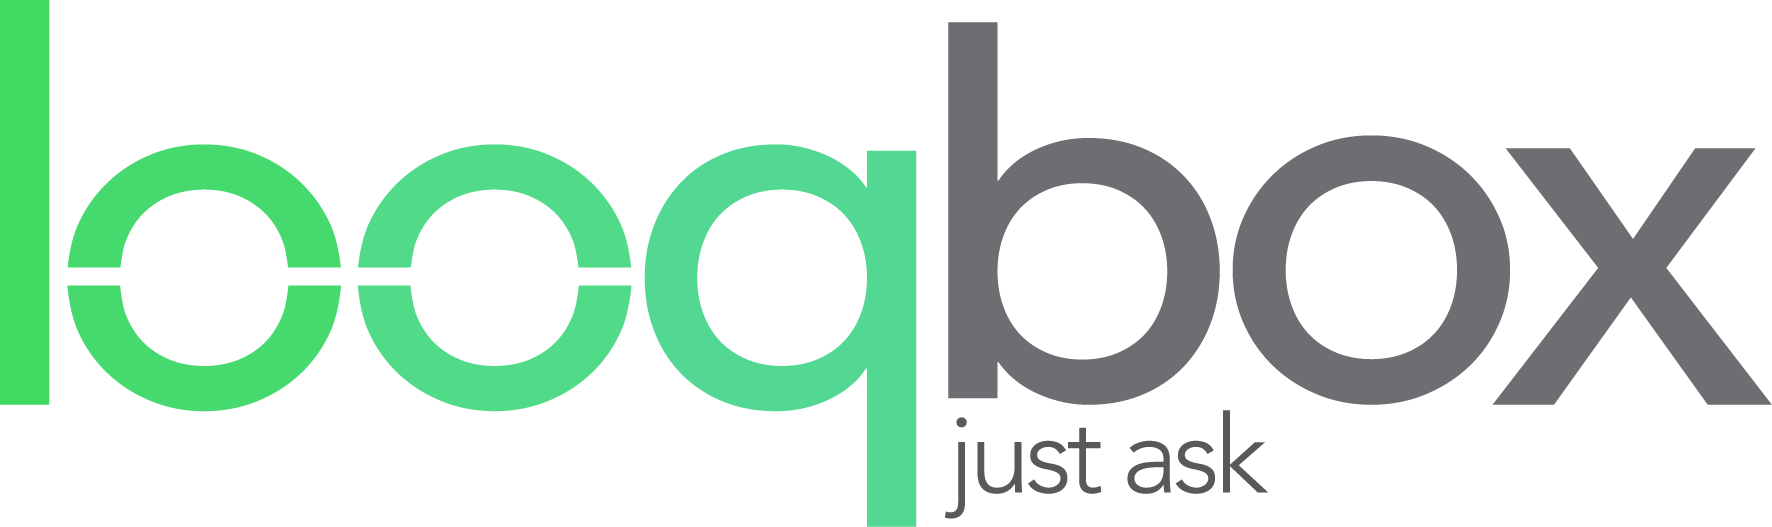

## SQL test
Create queries using the schema looqbox_challenge from the database (credentials provided through e-mail) to answer the following questions:

1 - How many products does the company have?

2 - What are the 10 most expensive products in the company?

3 - What sections do the 'BEBIDAS' and 'PADARIA' departments have?

4 - Which store sold the most products in one day? Which day?

5 - Bonus!! What was the total sale of products (in $) of each business area in the first quarter of 2019?

## Building your own visualization
Create at least one chart using the table IMDB_movies.

The code must be in R or Python, and you are free to use any libraries, data in the table and graphic format.

- I preferred to use Google Collaboratory because I can easly save a PDF file that shows all the results in a clear way. Also, Collaboratory allows me to upload .CSV files with the information that I acquired from the database and create tables using the Pandas library.
My knowledge on MySQL Workbench is very basic, therefore my queries may not be optimal and is also why I used Collaboratory to replicate the tables.


In [65]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - How many products does the company have?

MySQL query
```
select COUNT(product_cod) as Products from data_product;
```



In [66]:
import pandas as pd

products = pd.read_csv('total_products.csv', sep = ',', index_col = 'Products')
products

""
Products
9994


# 2- What are the 10 most expensive products in the company?



MySQL query
```
select product_name as Product, product_val as Price
from data_product
order by product_val desc
limit 10;
```



In [67]:
most_expensive = pd.read_csv('most_expensive.csv', sep = ',')
most_expensive.index = most_expensive.index + 1
most_expensive

,Product,Price
1,Whisky Escoces THE MACALLAN Ruby Garrafa 700ml...,741.99
2,Whisky Escoces JOHNNIE WALKER Blue Label Garra...,735.90
3,Cafeteira Expresso 3 CORACOES Tres Modo Vermelho,499.00
4,Vinho Portugues Tinto Vintage QUINTA DO CRASTO...,445.90
5,Escova Dental Eletrica ORAL B D34 Professional...,399.90
6,Champagne Rose VEUVE CLICQUOT PONSARDIM Garraf...,366.90
7,Champagne Frances Brut Imperial MOET Rose Garr...,359.90
8,Conjunto de Panelas Allegra em Inox TRAMONTINA...,359.00
9,Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml,329.90
10,Champagne Frances Brut Imperial MOET & CHANDON...,315.90


# 3 - What sections do the 'BEBIDAS' and 'PADARIA' departments have?

MySQL query
```
select distinct section_name as 'Bebidas Department Sections' from data_product
where dep_name = 'BEBIDAS'
order by section_name asc;

select distinct section_name as 'Padaria Department Sections' from data_product
where dep_name = 'PADARIA'
order by section_name asc;
```



In [68]:
bebidas = pd.read_csv('bebidas.csv', sep = ',',
                      index_col= 'Bebidas Department Sections')
bebidas

""
Bebidas Department Sections
BEBIDAS
CERVEJAS
REFRESCOS
VINHOS


In [69]:
padaria = pd.read_csv('padaria.csv', sep = ',', 
                      index_col= 'Padaria Department Sections')
padaria

""
Padaria Department Sections
DOCES-E-SOBREMESAS
GESTANTE
PADARIA
QUEIJOS-E-FRIOS


# 4 - Which store sold the most products in one day? Which day?

MySQL query
```
select store_code as StoreID, sales_qty as Sales, date as Date from data_store_sales
order by sales_qty desc
limit 1;

select store_code as StoreID, store_name as Store from data_store_cad
where store_code = '2'; 
```



In [70]:
#First I accessed the DATA_STORE_SALES table to identify the ID of the store 
#that had sold the most and on what date.

store_date = pd.read_csv('store1.csv', sep = ',', index_col= 'StoreID')
store_date

,Sales,Date
StoreID,,
2,24332,2019-07-03


In [71]:
# After that I identified the store name using the ID on the DATA_STORE_CAD
# table.
# I lack the knowledge on how to make this into a one-step query on MySQL.
 
store_name = pd.read_csv('store2.csv', sep = ',', index_col= 'StoreID')
store_name

,Store
StoreID,
2,Chicago


# 5 - Bonus!! What was the total sale of products (in $) of each business area in the first quarter of 2019?

MySQL query
```
#identifying the business areas
select store_code, store_name, business_name, business_code from data_store_cad
order by business_code asc;

# Business 1: Varejo
select sum(sales_value) as 'Varejo total sales 1st Quarter 2019' from data_store_sales 
where (DATE BETWEEN '2019-01-01' AND '2019-03-31') 
and (STORE_CODE = '1' or  STORE_CODE = '2' or STORE_CODE = '3' or STORE_CODE = '4');

# Business 2: Proximidade
select sum(sales_value) as 'Proximidade total sales 1st Quarter 2019' from data_store_sales 
where (DATE BETWEEN '2019-01-01' AND '2019-03-31') 
and (STORE_CODE = '5' or  STORE_CODE = '6' or STORE_CODE = '7' or STORE_CODE = '8');

#Business 3: Posto
select sum(sales_value) as 'Posto total sales 1st Quarter 2019' from data_store_sales 
where (DATE BETWEEN '2019-01-01' AND '2019-03-31') 
and (STORE_CODE = '17' or  STORE_CODE = '18' or STORE_CODE = '19' or STORE_CODE = '20');

#Business 4: Farma  
select sum(sales_value) as 'Farma total sales 1st Quarter 2019' from data_store_sales 
where (DATE BETWEEN '2019-01-01' AND '2019-03-31') 
and (STORE_CODE = '9' or  STORE_CODE = '10' or STORE_CODE = '11' or STORE_CODE = '12');

#Business 5: Atacado
select sum(sales_value) as 'Atacado total sales 1st Quarter 2019' from data_store_sales 
where (DATE BETWEEN '2019-01-01' AND '2019-03-31') 
and (STORE_CODE = '13' or  STORE_CODE = '14' or STORE_CODE = '15' or STORE_CODE = '16');



```



In [72]:
#identifying the business areas

business_areas = pd.read_csv('data_store_cad.csv', sep = ',')
business_areas.index = business_areas.index + 1
business_areas

,store_code,store_name,business_name,business_code
1,1,Sao Paulo,Varejo,1
2,2,Chicago,Varejo,1
3,3,Roma,Varejo,1
4,4,Tokio,Varejo,1
5,5,Paris,Proximidade,2
6,6,Berlin,Proximidade,2
7,7,New York,Proximidade,2
8,8,Belem,Proximidade,2
9,17,Sidney,Posto,3
10,18,Bangkok,Posto,3


In [73]:
# Business 1: Varejo
varejo = pd.read_csv('varejo.csv', sep = ',', 
                     index_col = 'Varejo total sales 1st Quarter 2019')
varejo

""
Varejo total sales 1st Quarter 2019
81032347.65


In [74]:
# Business 2: Proximidade
proximidade = pd.read_csv('proximidade.csv', sep = ',', 
                     index_col = 'Proximidade total sales 1st Quarter 2019')
proximidade

""
Proximidade total sales 1st Quarter 2019
80171122.8


In [75]:
# Business 3: Posto
posto = pd.read_csv('posto.csv', sep = ',', 
                     index_col = 'Posto total sales 1st Quarter 2019')
posto

""
Posto total sales 1st Quarter 2019
32072326.4


In [76]:
# Business 4: Farma
farma = pd.read_csv('farma.csv', sep = ',', 
                     index_col = 'Farma total sales 1st Quarter 2019')
farma

""
Farma total sales 1st Quarter 2019
81776691.73


In [77]:
# Business 5: Atacado
atacado = pd.read_csv('atacado.csv', sep = ',', 
                     index_col = 'Atacado total sales 1st Quarter 2019')
atacado

""
Atacado total sales 1st Quarter 2019
80384884.6


# Building your own visualization
Create at least one chart using the table IMDB_movies.
The code must be in R or Python, and you are free to use any libraries, data in the table and graphic format.
- I intented to analyze with two bar charts the relation between Metascore (specialized critic ratings) and the general public score. For this I picked the five movies with the highest income and also the five with the lowest from the year 2006. I chose this year because, even though specialized websites and magazines were available, youtube reviews weren't part of the movie critique scenery yet. The Grouped Bar chart gives a clear comparison between two variables.
- In order to do a better comparisson between the ratings I had to alter the values of the Metascore column, since it's ratings are on a scale of 0-100, while the Ratings column is on a scale of 0-10.
- The pie chart was used to compare the movies revenues. It is very usefull to show how a movie performed on the box office compared to another.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
movies_data_top = pd.read_csv('imdb_movies1.csv', sep = ',')
movies_data_top 

,Title,RevenueMillions,Rating,Metascore
0,Pirates of the Caribbean: Dead Man's Chest,423,7,53
1,Cars,244,7,73
2,X-Men: The Last Stand,234,7,58
3,The Da Vinci Code,218,7,46
4,300,211,8,52


In [80]:
#changing the Metascore values to a 0-10 scale, rounded up. 
#There must be an easier method, but I don't know it.
movies_data_top["Metascore"].replace({53: 5, 73: 7, 58: 6,
                                      46: 5, 52: 5}, inplace=True)
movies_data_top

,Title,RevenueMillions,Rating,Metascore
0,Pirates of the Caribbean: Dead Man's Chest,423,7,5
1,Cars,244,7,7
2,X-Men: The Last Stand,234,7,6
3,The Da Vinci Code,218,7,5
4,300,211,8,5


In [81]:
movies_data_bottom = pd.read_csv('imdb_movies2.csv', sep = ',')
movies_data_bottom 

,Title,RevenueMillions,Rating,Metascore
0,Idiocracy,0,7,66
1,Perfume: The Story of a Murderer,2,8,56
2,She's the Man,2,6,45
3,The Host,2,7,85
4,The Fall,2,8,64


In [82]:
#changing the Metascore values to a 0-10 scale. 
#There must be an easier method, but I don't know it.
movies_data_bottom["Metascore"].replace({66: 7, 56: 6, 45: 4,
                                      85: 8, 64: 6}, inplace=True)
movies_data_bottom

,Title,RevenueMillions,Rating,Metascore
0,Idiocracy,0,7,7
1,Perfume: The Story of a Murderer,2,8,6
2,She's the Man,2,6,4
3,The Host,2,7,8
4,The Fall,2,8,6


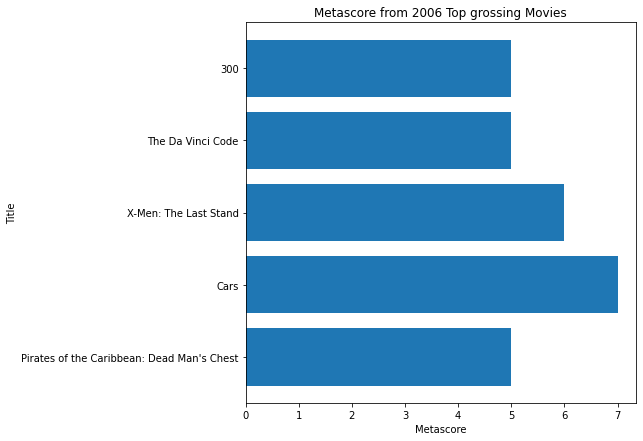

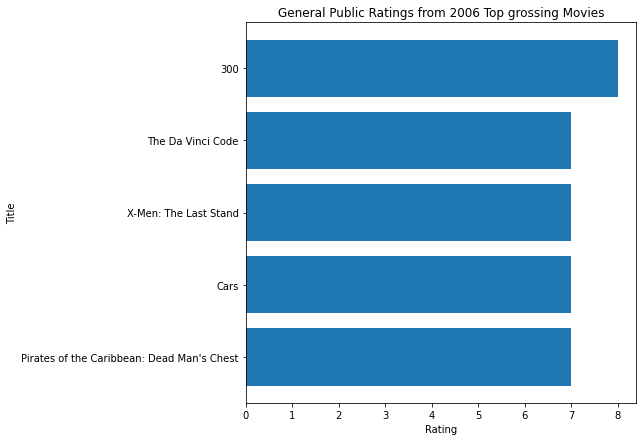

In [83]:
#Bar charts for top grossing movies
#Metascore Bar Chart 
y=movies_data_top['Title']
x=movies_data_top['Metascore']
plt.figure(figsize=(7,7))
plt.barh(y, x)
plt.ylabel("Title")
plt.xlabel("Metascore")
plt.title("Metascore from 2006 Top grossing Movies")
plt.show()

#Rating Bar Chart
y=movies_data_top['Title']
x=movies_data_top['Rating']
plt.figure(figsize=(7,7))
plt.barh(y, x)
plt.ylabel("Title")
plt.xlabel("Rating")
plt.title("General Public Ratings from 2006 Top grossing Movies")
plt.show()

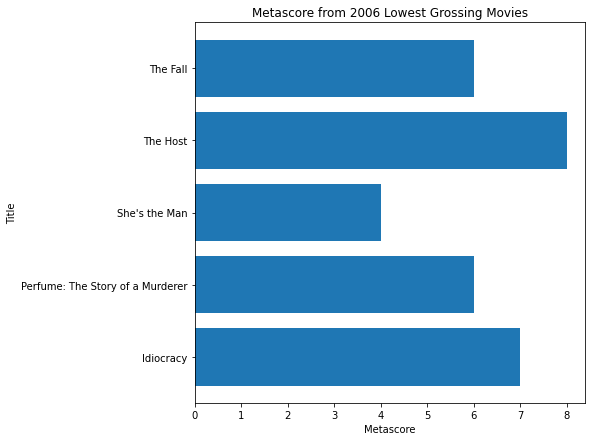

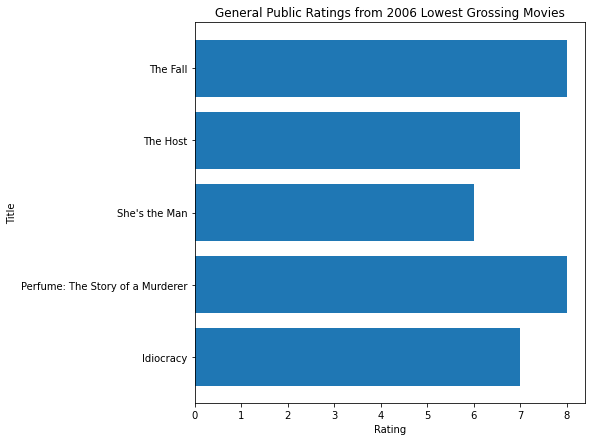

In [84]:
#Bar charts for lowest grossing movies
#Metascore Bar Chart 
y=movies_data_bottom['Title']
x=movies_data_bottom['Metascore']
plt.figure(figsize=(7,7))
plt.barh(y, x)
plt.ylabel("Title")
plt.xlabel("Metascore")
plt.title("Metascore from 2006 Lowest Grossing Movies")
plt.show()

#Rating Bar Chart
y=movies_data_bottom['Title']
x=movies_data_bottom['Rating']
plt.figure(figsize=(7,7))
plt.barh(y, x)
plt.ylabel("Title")
plt.xlabel("Rating")
plt.title("General Public Ratings from 2006 Lowest Grossing Movies")
plt.show()

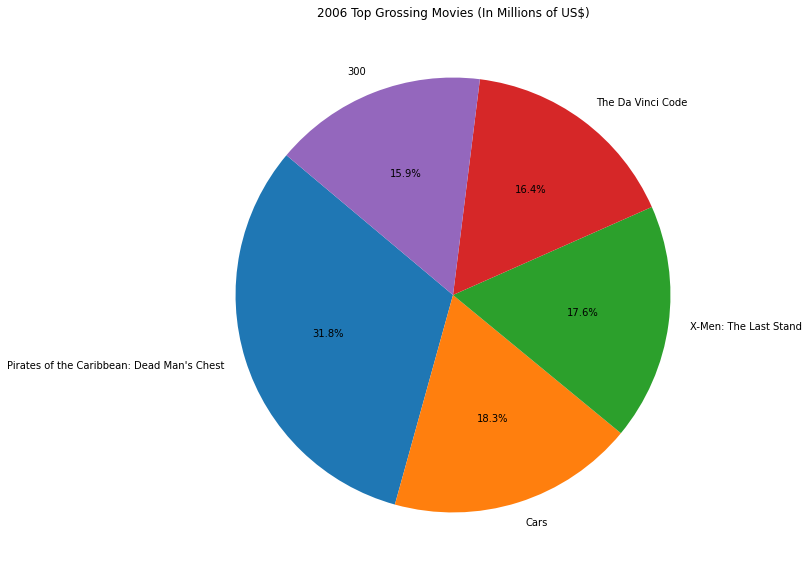

In [85]:
#Piechart for revenue comparison top Grossing Movies
movie = movies_data_top["Title"]
revenue = movies_data_top["RevenueMillions"]  
plt.pie(revenue, labels=movie, 
autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("2006 Top Grossing Movies (In Millions of US$)")
plt.show()

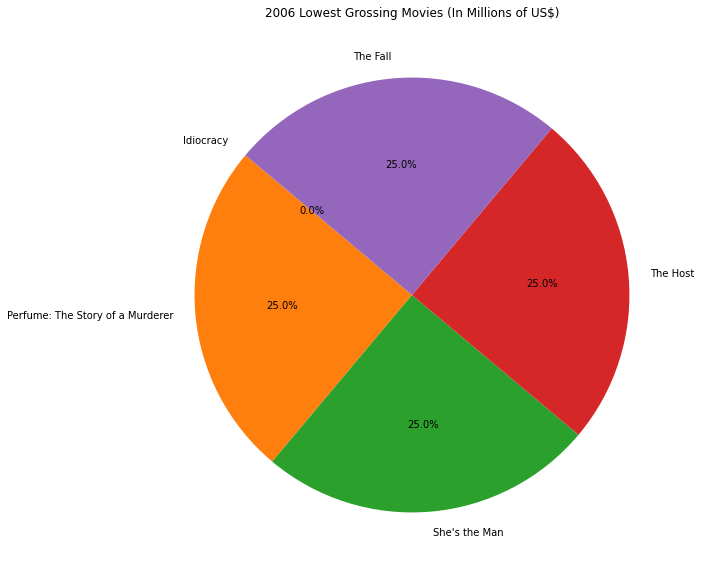

In [86]:
#Piechart for revenue comparison lowest Grossing Movies
movie = movies_data_bottom["Title"]
revenue = movies_data_bottom["RevenueMillions"]  
plt.pie(revenue, labels=movie, 
autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("2006 Lowest Grossing Movies (In Millions of US$)")
plt.show()